# Biology

In [1]:
from autograd import elementwise_grad as egrad
import autograd.numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Biological processes are described using equations. One famous one is the logistic curve, which is used to describe the accumulation of a population of things until saturation. (Examples include enzyme kinetics, or bacterial growth, or more.)

The curve in its simplest form looks as such:

$$ y = \frac{1}{1 + e^{-x}} $$

When parameterized with more constants, it can look as "general" (a.k.a. complicated) as such:

$$ y = \frac{L}{1 + e^{-k(x - x_0)}} $$

You'll notice that when $ L = 1 $, $ x_0 = 0 $, and $ k = 1 $, the bottom equation becomes the top equation.

The curve looks like this:

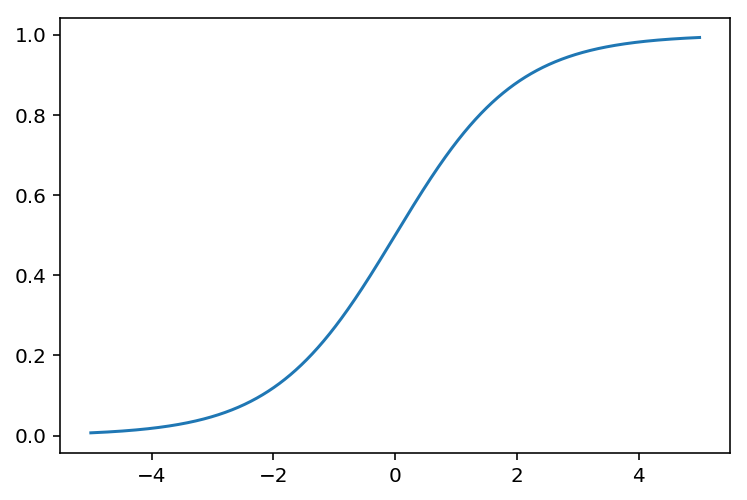

In [13]:
def logistic(x, L=1, x0=0, k=1):
    denom = 1 + np.exp(-k * (x - x0)) 
    return L / denom


x = np.linspace(-5, 5, 3000)
y = logistic(x)
plt.plot(x, y)

Where is the growth rate the highest? By visual inspection, it should be at the point where $ x = 0 $. We might want to take the derivative of $ y $ w.r.t. $ x $, but doing so analytically is difficult for lazy programmers (not so for mathematicians). Using `autograd`, we can analytically compute the derivative of the function for any given $ x $, and use it to confirm that the highest growth rate is at 0.

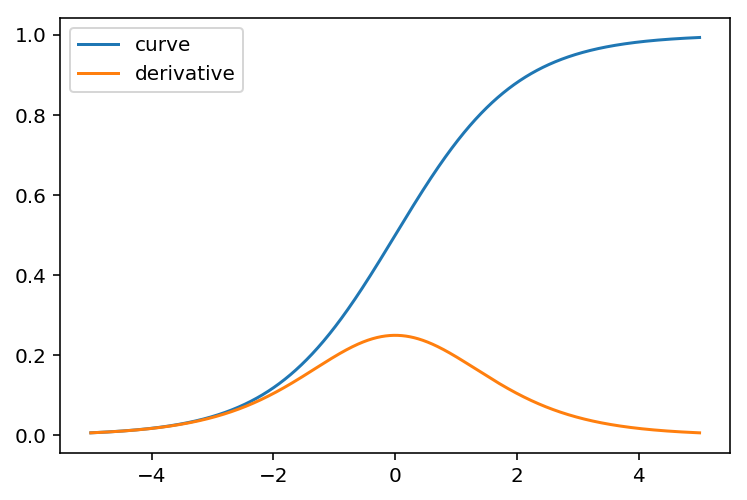

In [14]:
logistic_grad = egrad(logistic)

y_prime =  logistic_grad(x)

plt.plot(x, y, label='curve')
plt.plot(x, y_prime, label='derivative')
plt.legend()